In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
Y = df['target']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().drop('count')

mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
mean    14.127292     19.289649       91.969033   654.889104         0.096360   
std      3.524049      4.301036       24.298981   351.914129         0.014064   
min      6.981000      9.710000       43.790000   143.500000         0.052630   
25%     11.700000     16.170000       75.170000   420.300000         0.086370   
50%     13.370000     18.840000       86.240000   551.100000         0.095870   
75%     15.780000     21.800000      104.100000   782.700000         0.105300   
max     28.110000     39.280000      188.500000  2501.000000         0.163400   

      mean compactness  mean concavity  mean concave points  mean symmetry  \
mean          0.104341        0.088799             0.048919       0.181162   
std           0.052813        0.079720             0.038803       0.027414   
min           0.019380        0.000000             0.000000       0.106000   
25%           0.064920        0.029560             0.020310       0.161900   
50%           0.092630        0.061540             0.033500       0.179200   
75%           0.130400        0.130700             0.074000       0.195700   
max           0.345400        0.426800             0.201200       0.304000   

      mean fractal dimension  ...  worst texture  worst perimeter  \
mean                0.062798  ...      25.677223       107.261213   
std                 0.007060  ...       6.146258        33.602542   
min                 0.049960  ...      12.020000        50.410000   
25%                 0.057700  ...      21.080000        84.110000   
50%                 0.061540  ...      25.410000        97.660000   
75%                 0.066120  ...      29.720000       125.400000   
max                 0.097440  ...      49.540000       251.200000   

       worst area  worst smoothness  worst compactness  worst concavity  \
mean   880.583128          0.132369           0.254265         0.272188   
std    569.356993          0.022832           0.157336         0.208624   
min    185.200000          0.071170           0.027290         0.000000   
25%    515.300000          0.116600           0.147200         0.114500   
50%    686.500000          0.131300           0.211900         0.226700   
75%   1084.000000          0.146000           0.339100         0.382900   
max   4254.000000          0.222600           1.058000         1.252000   

      worst concave points  worst symmetry  worst fractal dimension    target  
mean              0.114606        0.290076                 0.083946  0.627417  
std               0.065732        0.061867                 0.018061  0.483918  
min               0.000000        0.156500                 0.055040  0.000000  
25%               0.064930        0.250400                 0.071460  0.000000  
50%               0.099930        0.282200                 0.080040  1.000000  
75%               0.161400        0.317900                 0.092080  1.000000  
max               0.291000        0.663800                 0.207500  1.000000  

[7 rows x 31 columns]

In [5]:
corr_matrix = X.corr()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

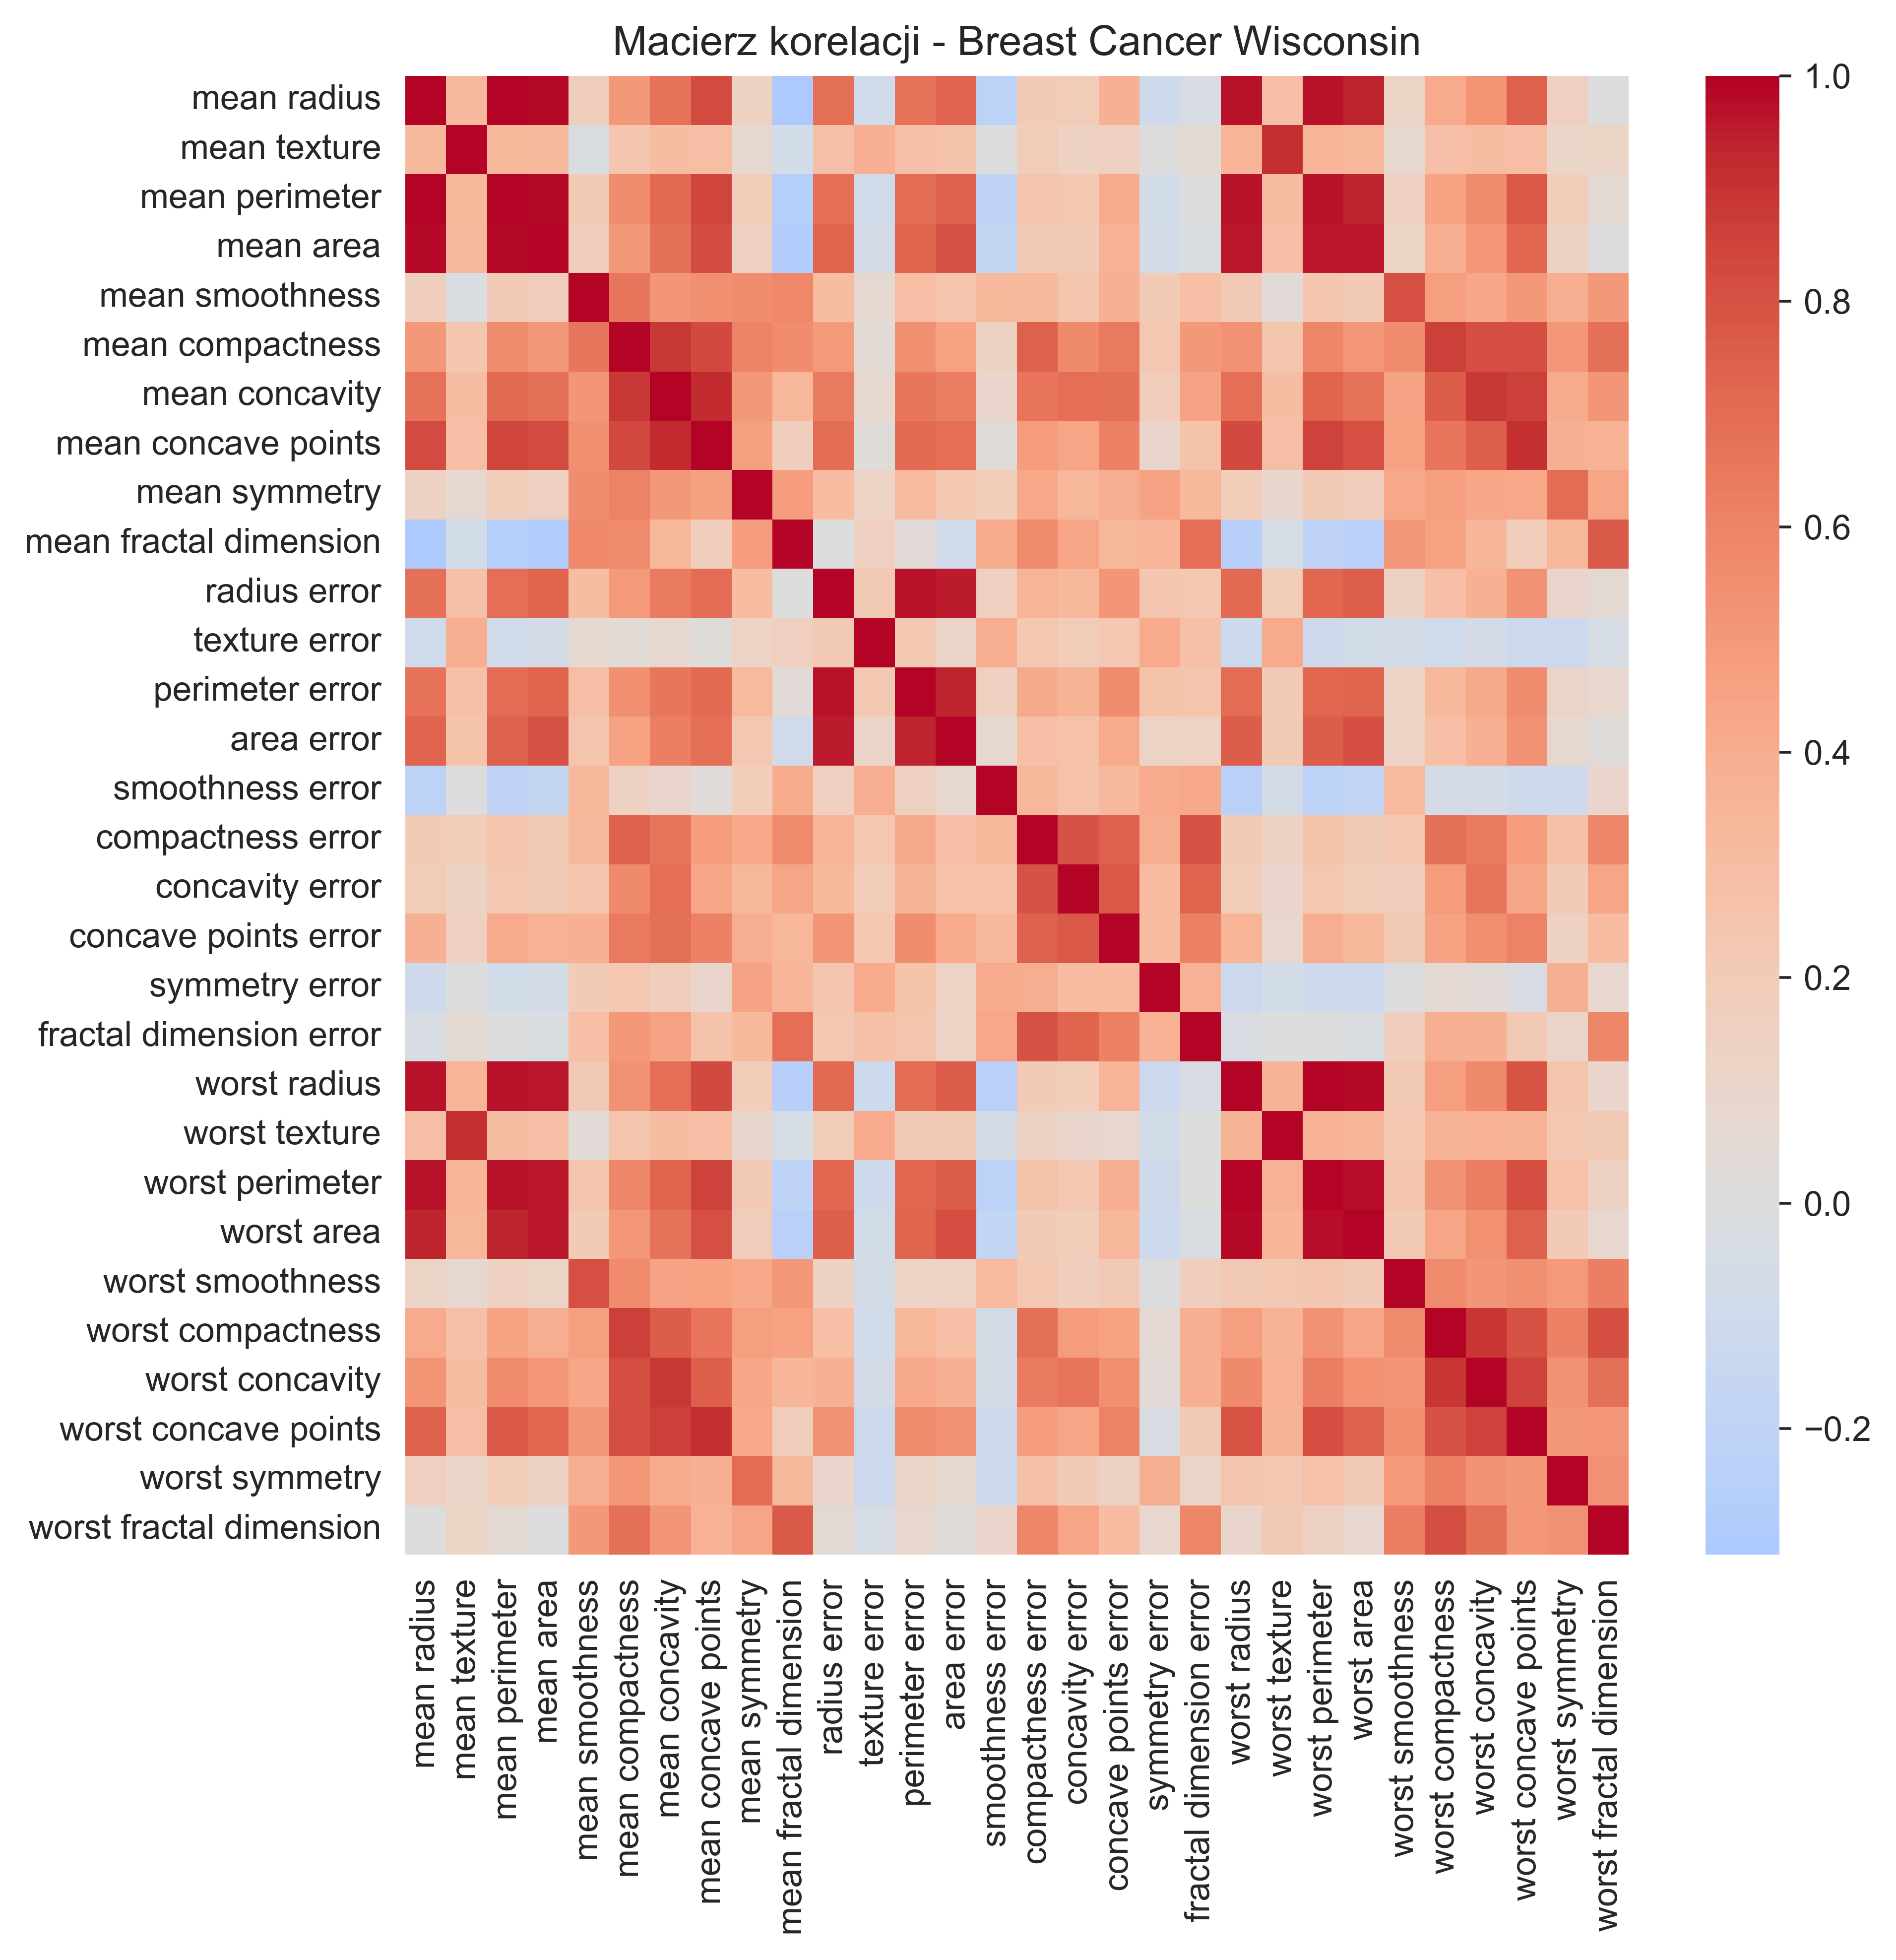

In [7]:
plt.figure(figsize=(8, 8), dpi=500)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Macierz korelacji - Breast Cancer Wisconsin")
plt.tight_layout()
plt.show()

In [8]:
# DATASETS DIFFERENCE TESTS #

df_perturbed = pd.read_csv("../../data/perturbed_datasets/BCW_1to50pct_15of30_g12_pca/perturbed_50_pct.csv")
diff_mask = df.ne(df_perturbed)

num_modified = diff_mask.values.sum()
print(f"Number of cells modified: {num_modified}\n")

row_idx, col_idx = np.where(diff_mask.values)
modified_cells = [(df.index[r], df.columns[c])
                  for r, c in zip(row_idx, col_idx)]
print("Modified cells (row, column):")
for cell in modified_cells:
    print(cell)

# NUMBER OF CELLS - OK #
# EXCLUDED COLUMNS - OK #
# DEFINED NUMBER OF COLUMNS - OK #

Number of cells modified: 4275

Modified cells (row, column):
(2, 'mean radius')
(2, 'mean perimeter')
(2, 'mean area')
(2, 'mean compactness')
(2, 'mean concavity')
(2, 'mean concave points')
(2, 'radius error')
(2, 'perimeter error')
(2, 'area error')
(2, 'worst radius')
(2, 'worst perimeter')
(2, 'worst area')
(2, 'worst compactness')
(2, 'worst concavity')
(2, 'worst concave points')
(5, 'mean radius')
(5, 'mean perimeter')
(5, 'mean area')
(5, 'mean compactness')
(5, 'mean concavity')
(5, 'mean concave points')
(5, 'radius error')
(5, 'perimeter error')
(5, 'area error')
(5, 'worst radius')
(5, 'worst perimeter')
(5, 'worst area')
(5, 'worst compactness')
(5, 'worst concavity')
(5, 'worst concave points')
(9, 'mean radius')
(9, 'mean perimeter')
(9, 'mean area')
(9, 'mean compactness')
(9, 'mean concavity')
(9, 'mean concave points')
(9, 'radius error')
(9, 'perimeter error')
(9, 'area error')
(9, 'worst radius')
(9, 'worst perimeter')
(9, 'worst area')
(9, 'worst compactness')
(9